## import libraries

In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

import os, glob

os.chdir("/Users/choyademacbook/Desktop/2020Spring/IMT575/finalProject/dataset/Yelp_dataset")

## prepare data

In [3]:
col_list = ['user_id']
reader = pd.read_csv("yelp_restaurant_review.csv", usecols=col_list, iterator=True)
loop = True
chunkSize = 10000
chunks = []
while loop:
    try:
        chunk = reader.get_chunk(chunkSize)
        chunks.append(chunk)
    except StopIteration:
        loop = False
        print("Iteration is stopped.")
temp_user = pd.concat(chunks, ignore_index=True)
restaurant_user = pd.DataFrame()
restaurant_user["user_id"] = temp_user["user_id"].unique()
restaurant_user.to_csv("restaurant_user.csv", index=False)

Iteration is stopped.


In [4]:
# select users
origin = pd.read_csv ('use_all_int.csv')
restaurant_user = pd.read_csv("restaurant_user.csv")
df = origin.loc[origin.user_id.isin(restaurant_user.user_id)]

df.shape

(1399953, 23)

In [5]:
df["sum_compliment"] = df.iloc[:,1:12].sum(axis=1)
df["sum_votes"] = df.iloc[:,[12,15,17]].sum(axis=1)

/Users/choyademacbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/choyademacbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df.dtypes

average_stars         float64
compliment_cool         int64
compliment_cute         int64
compliment_funny        int64
compliment_hot          int64
compliment_list         int64
compliment_more         int64
compliment_note         int64
compliment_photos       int64
compliment_plain        int64
compliment_profile      int64
compliment_writer       int64
cool                    int64
elite                  object
fans                    int64
funny                   int64
review_count            int64
useful                  int64
user_id                object
friends_count           int64
elite_count             int64
since_year              int64
since_month             int64
sum_compliment          int64
sum_votes               int64
dtype: object

In [7]:
# correlation matrix
#df.drop(["average_stars", "elite", "user_id"], axis=1).apply(lambda x: x.corr(df["average_stars"]))
#df["fans"].corr(df["review_count"])
#df["fans"].corr(df["elite_count"])
#df["elite_count"].corr(df["review_count"])

corrMatrix=df.drop(["elite", "user_id"], axis=1).corr()
newCorrMatrix = df[["average_stars", "sum_compliment", "sum_votes", 
                    "fans", "review_count", "friends_count", "elite_count"]].corr()
# sn.heatmap(corrMatrix, annot=True)

# stars distribution
group_year = df["user_id"].groupby(df["since_year"]).count()
group_star = df["user_id"].groupby(df["average_stars"]).count()


In [12]:
############################ specific users############################ 
top_elite = df.nlargest(10,['elite_count'], keep="all")[["user_id", "elite_count"]]
top_review = df.nlargest(10,['review_count'], keep="all")[["user_id", "review_count"]]
top_fan = df.nlargest(10,['fans'], keep="all")[["user_id", "fans"]]
top_friend = df.nlargest(10,['friends_count'], keep="all")[["user_id", "friends_count"]]

## plot

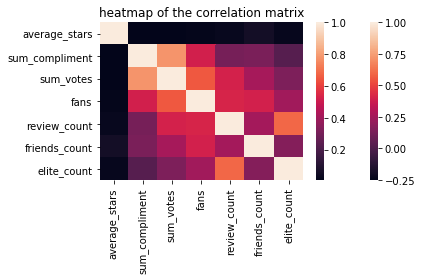

In [8]:
# heatmap of correlation matrix

plot1 = sns.heatmap(corrMatrix, annot=False)
plot1.set_title("heatmap of the correlation matrix")
plt.tight_layout()
plt.savefig('result/restaurant_user/fig_correlation_matrix_user.png', dpi=400)

plot1_1 = sns.heatmap(newCorrMatrix, annot=False)
plot1_1.set_title("heatmap of the correlation matrix")
plt.tight_layout()
# plt.savefig('result/restaurant_user/fig_new_correlation_matrix_user.png', dpi=400)

Text(0.5, 1.0, 'the distribution of average stars per user with a histogram')

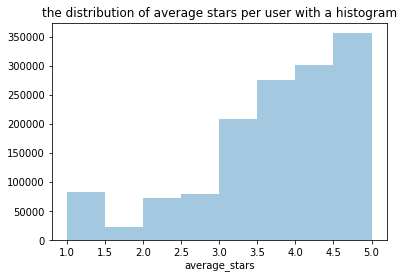

In [9]:
# avg star distribution

#df["average_stars"].plot.box()
#plot2 = sns.boxplot(x=df["average_stars"])
plot2 = sns.distplot(df["average_stars"], bins=8, kde=False)
plot2.set_title("the distribution of average stars per user with a histogram")
#plt.savefig('result/restaurant_user/fig_star_distribution.png', dpi=300)

Text(0.5, 0, 'year')

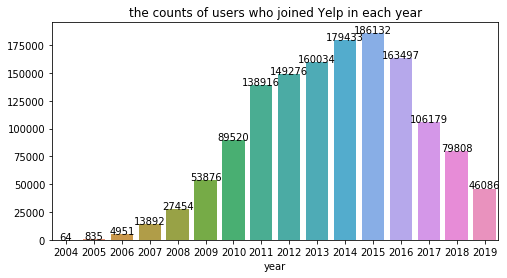

In [10]:
#data
#sns.countplot(x='since_year', data=df)
labels=df['since_year'].value_counts(sort=False).index
values=df['since_year'].value_counts(sort=False).values

plt.figure(figsize = (8, 4))
ax = sns.barplot(x=labels, y=values)
ax.set_title("the counts of users who joined Yelp in each year")
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1, values[i],ha="center")
plt.xlabel("year")
#plt.savefig('result/restaurant_user/fig_counts_user_per_year.png', dpi=300)

Text(0.5, 1.0, "the distribution of users' review counts with the box plot")

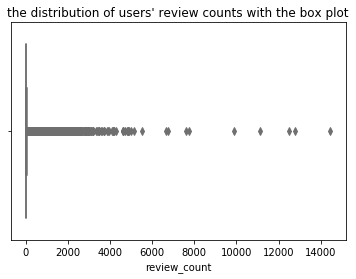

In [11]:
# review count distribution
plot4 = sns.boxplot(x=df["review_count"], color="skyblue")
plot4.set_title("the distribution of users' review counts with the box plot")
# plt.savefig('result/restaurant_user/fig_reviewcount_distribution.png', dpi=300)

In [13]:
df = pd.read_csv ('use_all_int.csv')
describe = pd.read_csv('./result/all_user/describe_user.csv')
df["sum_compliment"] = df.iloc[:,1:12].sum(axis=1)
df["sum_votes"] = df.iloc[:,[12,15,17]].sum(axis=1)

/Users/choyademacbook/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
